In [13]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Inizializzazione del dataset

In [14]:
house_df = pd.read_csv('dataset/dataHouse.csv') #read dataset
pd.set_option("display.max_columns", 100) #displayed column range increased

def set_new_index():
    house_df.set_index('id', inplace=True) # set id column as new dataset index
    
set_new_index()

Omogeneizzazione del tipo delle colonne:
- da int64 a float64

In [15]:
def set_columns_type():
    for column in house_df.columns: #loop through dataset colums
        
        if 'Year' in column: #check substring
            house_df[column]=house_df[column].astype(np.object0) #convert label with "Year" substring into categorical label
        if house_df.dtypes[column] == np.int64 : #check column type
            house_df[column]=house_df[column].astype(np.float64) #convert type from int64 to floa64     

    bath=[x for x in house_df.columns if 'Bath' in x] #get all bath features
    house_df['Total_Bath'] = house_df[bath].sum(axis=1) #sum all feature values and save it inside total bath feature
    house_df.drop(['Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath'], axis=1, inplace=True) #drop old bath features
    
set_columns_type()

In [16]:

ALL_COLUMNS = set(house_df.columns.array) #create set with all column name
NUMERICAL_COLUMNS = set(house_df._get_numeric_data().columns) #NUMERICAL COLUMNS SET
CATEGORICAL_COLUMNS = (ALL_COLUMNS - NUMERICAL_COLUMNS ) # CATEGORICAL COLUMNS SET
print(f"CATEGORICAL: {CATEGORICAL_COLUMNS}")
print(f"NUMERICAL: {NUMERICAL_COLUMNS}")


CATEGORICAL: {'Alley', 'Overall_Qual', 'Exterior_1st', 'Garage_Type', 'Roof_Matl', 'Functional', 'Utilities', 'Bldg_Type', 'Roof_Style', 'Mas_Vnr_Type', 'Bsmt_Cond', 'Heating', 'Year_Remod_Add', 'Lot_Shape', 'Misc_Feature', 'Neighborhood', 'Overall_Cond', 'Garage_Cond', 'Bsmt_Qual', 'Condition_1', 'Street', 'Garage_Qual', 'BsmtFin_Type_1', 'MS_Zoning', 'BsmtFin_Type_2', 'House_Style', 'Exter_Qual', 'Year_Sold', 'Sale_Type', 'Sale_Condition', 'Fireplace_Qu', 'MS_SubClass', 'Exter_Cond', 'Land_Contour', 'Lot_Config', 'Paved_Drive', 'Electrical', 'Pool_QC', 'Year_Built', 'Foundation', 'Condition_2', 'Land_Slope', 'Bsmt_Exposure', 'Central_Air', 'Fence', 'Heating_QC', 'Kitchen_Qual', 'Garage_Finish', 'Exterior_2nd'}
NUMERICAL: {'Garage_Area', 'Open_Porch_SF', 'Misc_Val', 'Lot_Frontage', 'Wood_Deck_SF', 'Garage_Cars', 'Total_Bath', 'Pool_Area', 'BsmtFin_SF_2', 'Screen_Porch', 'BsmtFin_SF_1', 'Mas_Vnr_Area', 'Fireplaces', 'TotRms_AbvGrd', 'Low_Qual_Fin_SF', 'Three_season_porch', 'Latitude', 

In [17]:
def print_unique_column_values(column_name):
    #print(f"{set(house_df[column_name])}")
    print(f"{column_name}: N° {len(set(house_df[column_name]))} - {(set(house_df[column_name]))} ")

for column in sorted(CATEGORICAL_COLUMNS):
    print_unique_column_values(column)

Alley: N° 3 - {'Paved', 'Gravel', 'No_Alley_Access'} 
Bldg_Type: N° 5 - {'TwnhsE', 'OneFam', 'Twnhs', 'Duplex', 'TwoFmCon'} 
BsmtFin_Type_1: N° 7 - {'Rec', 'LwQ', 'GLQ', 'Unf', 'No_Basement', 'ALQ', 'BLQ'} 
BsmtFin_Type_2: N° 7 - {'Rec', 'LwQ', 'GLQ', 'Unf', 'No_Basement', 'ALQ', 'BLQ'} 
Bsmt_Cond: N° 6 - {'Good', 'No_Basement', 'Excellent', 'Fair', 'Poor', 'Typical'} 
Bsmt_Exposure: N° 5 - {'Gd', 'No_Basement', 'Mn', 'Av', 'No'} 
Bsmt_Qual: N° 6 - {'Good', 'Excellent', 'No_Basement', 'Fair', 'Poor', 'Typical'} 
Central_Air: N° 2 - {'Y', 'N'} 
Condition_1: N° 9 - {'RRNn', 'Feedr', 'RRAe', 'Artery', 'RRNe', 'PosA', 'Norm', 'RRAn', 'PosN'} 
Condition_2: N° 8 - {'RRNn', 'Feedr', 'RRAe', 'Artery', 'PosA', 'Norm', 'RRAn', 'PosN'} 
Electrical: N° 6 - {'FuseA', 'Unknown', 'Mix', 'SBrkr', 'FuseF', 'FuseP'} 
Exter_Cond: N° 5 - {'Good', 'Typical', 'Fair', 'Poor', 'Excellent'} 
Exter_Qual: N° 4 - {'Good', 'Fair', 'Typical', 'Excellent'} 
Exterior_1st: N° 16 - {'CemntBd', 'AsphShn', 'Stone', 'BrkF

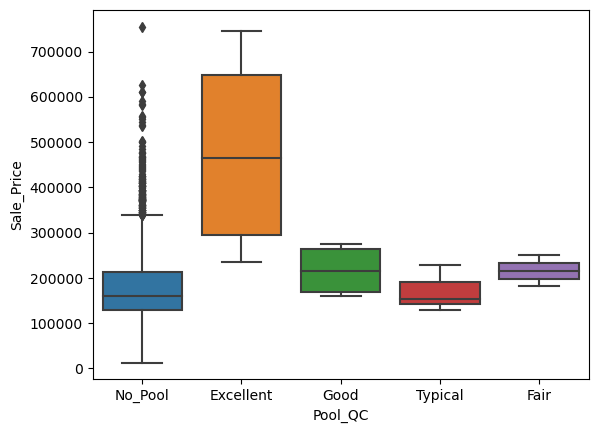

In [18]:

sns.boxplot(x="Pool_QC", y="Sale_Price", data=house_df)
house_df["Has_Pool"]=np.where(house_df["Pool_QC"].str.contains('No_Pool'), 0 , 1)
house_df.drop("Pool_QC", axis=1, inplace=True)

<AxesSubplot:xlabel='Has_Pool', ylabel='Sale_Price'>

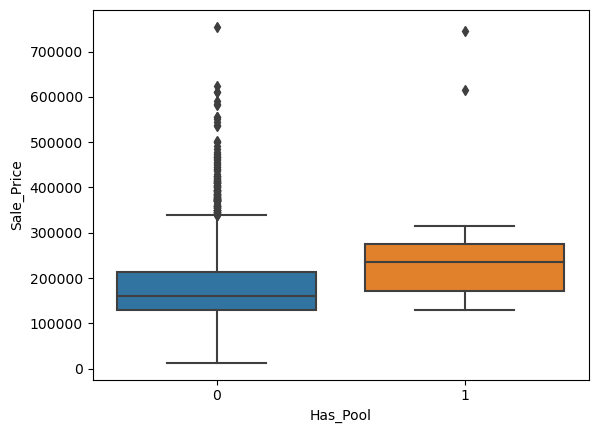

In [19]:
sns.boxplot(x="Has_Pool", y="Sale_Price", data=house_df)